In [1]:
%matplotlib inline

PCA
 
The first line turns on inline plotting, where plot graphics will appear in your notebook.
Now use pandas to read dataframe.

In [12]:
import pandas as pd
import io
import requests
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
url_ = "https://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/zip.digits/train."

In [4]:
label_numbers = []
data_all = []

In [5]:
for i in range(10):
    url = url_ + str(i)
    s = requests.get(url).content
    c = pd.read_csv(io.StringIO(s.decode('utf-8')))
    data_now = np.array(c,dtype='float32');
    label_numbers.append(data_now.shape[0])
    data_all.append(data_now)

Load dataset as 16x16 gray scale images of handwritten digits from the website.

In [6]:
data = data_all[0]
labels = [0]*label_numbers[0]

In [7]:
for i in range(1,10):
    data = np.concatenate((data,data_all[i]),axis=0)
    labels = labels + [i]*label_numbers[i]

In [8]:
data.shape

(7281, 256)

In [9]:
label_numbers

[1193, 1004, 730, 657, 651, 555, 663, 644, 541, 643]

Show some examples of images for each digit

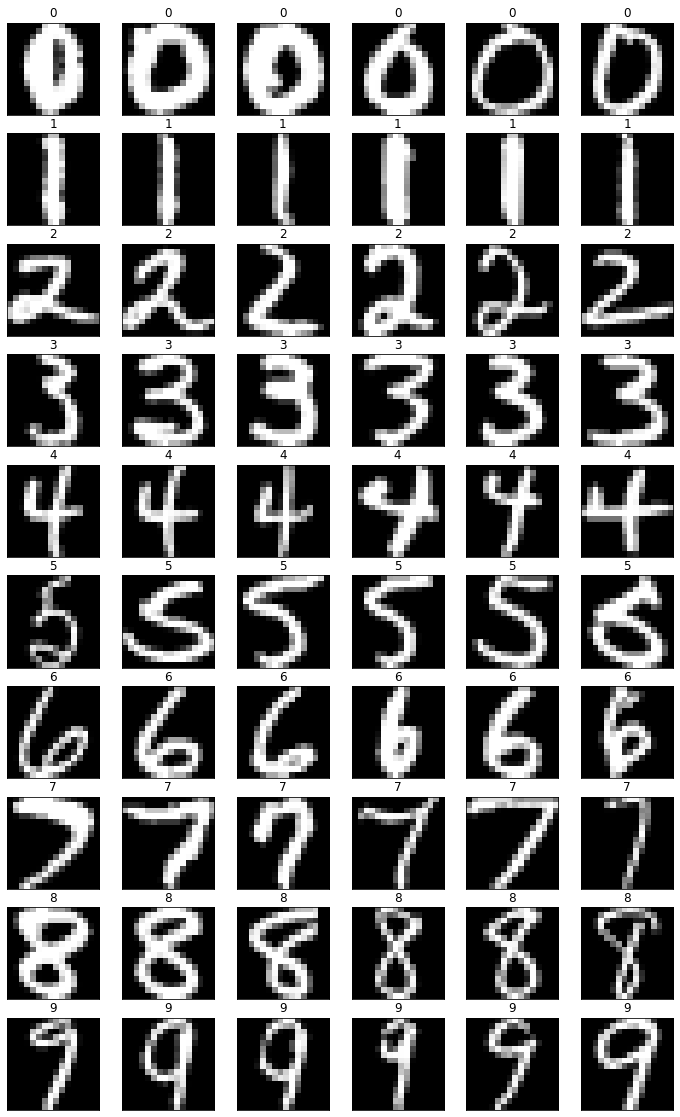

In [13]:
fig, axes = plt.subplots(nrows=10, ncols=6, figsize=(12, 20))

# Plot each subplot
for i in range(10):
    m = sum(label_numbers[:i+1])-200
    for j in range(6):
        ax = axes[i, j]
        img_now = data[m+j,:].reshape((16,16))
        ax.imshow(img_now,cmap='gray')
        ax.set_title(f'{i}')
        ax.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)

# Add a title for the whole figure
# fig.suptitle('My Combination Figure')
# fig.savefig('digit_figures.png',dpi=500)

# Display the figure
plt.show()

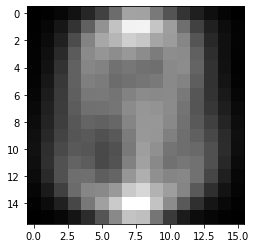

In [14]:
mu = np.mean(data, axis=0);
img_mu = np.reshape(mu,(16,16));
imgshow = plt.imshow(img_mu,cmap='gray')

# Start experiments

In [15]:
import time 
import matplotlib.pyplot as plt
# from sklearn.datasets import load_digits
from sklearn.decomposition import PCA, SparsePCA, KernelPCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 加载数据集
# digits = load_digits()
# X, y = digits.data, digits.target
X = data
y = np.array(labels)

# 数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用PCA对数据进行降维
t = time.time()
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_train)
PCA_time = time.time() - t

# 使用1-SparsePCA对数据进行降维
t = time.time()
sparse1_pca = SparsePCA(n_components=8,alpha=1)
X_sparse1_pca = sparse1_pca.fit_transform(X_train)
SPCA1_time = time.time() - t

# 使用10-SparsePCA对数据进行降维
t = time.time()
sparse10_pca = SparsePCA(n_components=8,alpha=10)
X_sparse10_pca = sparse10_pca.fit_transform(X_train)
SPCA10_time = time.time() - t

# 使用30-SparsePCA对数据进行降维
t = time.time()
sparse30_pca = SparsePCA(n_components=8,alpha=30)
X_sparse30_pca = sparse30_pca.fit_transform(X_train)
SPCA30_time = time.time() - t

# 使用Linear-KernelPCA对数据进行降维
t = time.time()
lkernel_pca = KernelPCA(n_components=8, kernel='linear')
X_lkernel_pca = lkernel_pca.fit_transform(X_train)
LKPCA_time = time.time() - t

# 使用Gaussian-KernelPCA对数据进行降维
t = time.time()
gkernel_pca = KernelPCA(n_components=8, kernel='rbf')
X_gkernel_pca = gkernel_pca.fit_transform(X_train)
GKPCA_time = time.time() - t

# 使用Sigmoid-KernelPCA对数据进行降维
t = time.time()
skernel_pca = KernelPCA(n_components=8, kernel='sigmoid')
X_skernel_pca = skernel_pca.fit_transform(X_train)
SKPCA_time = time.time() - t

Try some sparsity for SparsePCA for comparison

In [451]:
# 使用SparsePCA对数据进行降维
t = time.time()
sparse_pca_try = SparsePCA(n_components=16,alpha=30)
X_sparse_pca_try = sparse_pca_try.fit_transform(X_train)
SPCA_time_try = time.time() - t

In [452]:
SPCA_time_try

3.592846632003784

In [453]:
rf_sparse_pca_try = RandomForestClassifier(n_estimators=100, random_state=42)
rf_sparse_pca_try.fit(X_sparse_pca_try, y_train)
print("Accuracy of random forest classifier with SparsePCA: ", rf_sparse_pca_try.score(sparse_pca_try.transform(X_test), y_test),
      "with running time: ",SPCA_time_try)

Accuracy of random forest classifier with SparsePCA:  0.8325326012354153 with running time:  3.592846632003784


In [16]:
# 使用随机森林分类器进行数据分类
t = time.time()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
NoPCA_time_all = time.time()-t

# 分类器在测试集上的表现
print("Accuracy of random forest classifier with original data: ", 
      np.round(rf.score(X_test, y_test),4), 'running time: ',
     np.round(NoPCA_time_all,4))

# 使用降维后的数据进行分类
t = time.time()
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pca.fit(X_pca, y_train)
PCA_time_all = PCA_time + time.time()-t
print("Accuracy of random forest classifier with PCA: ", np.round(rf_pca.score(pca.transform(X_test), y_test),4), 
      "running time: ",np.round(PCA_time_all,4))

t = time.time()
rf_sparse1_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_sparse1_pca.fit(X_sparse1_pca, y_train)
SPCA1_time_all = SPCA1_time + time.time()-t
print("Accuracy of random forest classifier with SparsePCA with sparsity=1: ", 
      np.round(rf_sparse1_pca.score(sparse1_pca.transform(X_test), y_test),4),
      "running time: ",np.round(SPCA1_time_all,4))

t = time.time()
rf_sparse10_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_sparse10_pca.fit(X_sparse10_pca, y_train)
SPCA10_time_all = SPCA10_time + time.time()-t
print("Accuracy of random forest classifier with SparsePCA with sparsity=10: ", 
      np.round(rf_sparse10_pca.score(sparse10_pca.transform(X_test), y_test),4),
      "running time: ",np.round(SPCA10_time_all,4))

t = time.time()
rf_sparse30_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_sparse30_pca.fit(X_sparse30_pca, y_train)
SPCA30_time_all = SPCA30_time + time.time()-t
print("Accuracy of random forest classifier with SparsePCA with sparsity=30: ", 
      np.round(rf_sparse30_pca.score(sparse30_pca.transform(X_test), y_test),4),
      "running time: ",np.round(SPCA30_time_all,4))

t = time.time()
rf_lkernel_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_lkernel_pca.fit(X_lkernel_pca, y_train)
LKPCA_time_all = LKPCA_time + time.time()-t
print("Accuracy of random forest classifier with Linear KernelPCA: ", 
      np.round(rf_lkernel_pca.score(lkernel_pca.transform(X_test), y_test),4),
      "running time: ",np.round(LKPCA_time_all,4))

t = time.time()
rf_gkernel_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_gkernel_pca.fit(X_gkernel_pca, y_train)
GKPCA_time_all = GKPCA_time + time.time()-t
print("Accuracy of random forest classifier with Gaussian KernelPCA: ", 
      np.round(rf_gkernel_pca.score(gkernel_pca.transform(X_test), y_test),4),
      "running time: ",np.round(GKPCA_time_all,4))

t = time.time()
rf_skernel_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_skernel_pca.fit(X_skernel_pca, y_train)
SKPCA_time_all = SKPCA_time + time.time()-t
print("Accuracy of random forest classifier with Sigmoid KernelPCA: ", 
      np.round(rf_skernel_pca.score(skernel_pca.transform(X_test), y_test),4),
      "running time: ",np.round(SKPCA_time_all,4))

Accuracy of random forest classifier with original data:  0.9568 running time:  2.3284
Accuracy of random forest classifier with PCA:  0.8909 running time:  1.1012
Accuracy of random forest classifier with SparsePCA with sparsity=1:  0.8916 running time:  126.0109
Accuracy of random forest classifier with SparsePCA with sparsity=10:  0.8868 running time:  10.2889
Accuracy of random forest classifier with SparsePCA with sparsity=30:  0.8099 running time:  5.0429
Accuracy of random forest classifier with Linear KernelPCA:  0.8854 running time:  1.931
Accuracy of random forest classifier with Gaussian KernelPCA:  0.8819 running time:  1.9189
Accuracy of random forest classifier with Sigmoid KernelPCA:  0.8929 running time:  2.2692


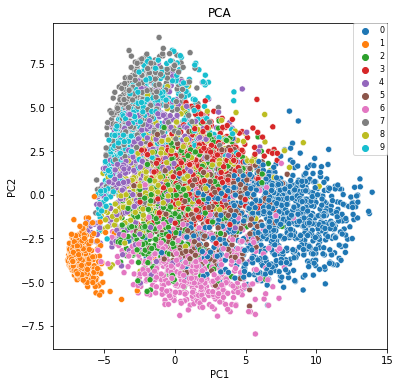

In [18]:
import seaborn as sns
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1],hue=y_train, palette='tab10')
# ax[0,0].scatter(X_pca[:, 0], X_pca[:, 1],label = 'data points', c=y_train, cmap='Paired')
ax.set_title("PCA")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=8)
# ax[0,0].legend(ncol=2, borderaxespad=0, fontsize=8)
fig.savefig('original_PCA.png',dpi=500,bbox_inches='tight')
plt.show()

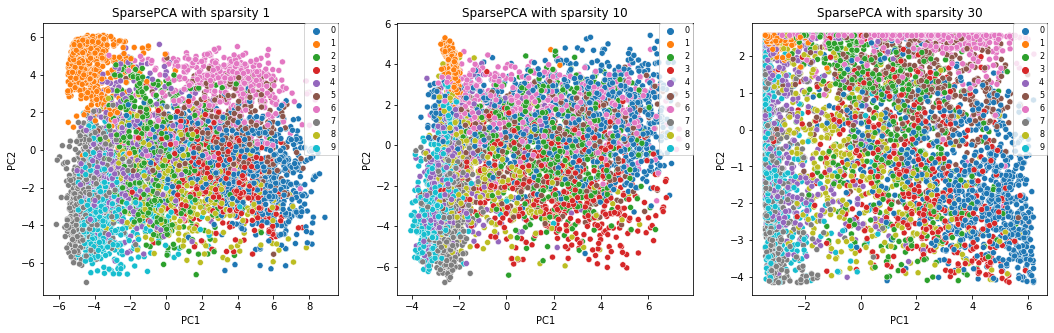

In [524]:
# 散点图可视化降维后的数据
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

sns.scatterplot(x=X_sparse1_pca[:, 0], y=X_sparse1_pca[:, 1],hue=y_train, palette='tab10', ax=ax[0])
# ax[0,1].scatter(X_sparse_pca[:, 0], X_sparse_pca[:, 1],label = y_train, c=y_train, cmap='Paired')
ax[0].set_title("SparsePCA with sparsity 1")
ax[0].set_xlabel("PC1")
ax[0].set_ylabel("PC2")
ax[0].legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=8)

sns.scatterplot(x=X_sparse10_pca[:, 0], y=X_sparse10_pca[:, 1],hue=y_train, palette='tab10', ax=ax[1])
# ax[0,1].scatter(X_sparse_pca[:, 0], X_sparse_pca[:, 1],label = y_train, c=y_train, cmap='Paired')
ax[1].set_title("SparsePCA with sparsity 10")
ax[1].set_xlabel("PC1")
ax[1].set_ylabel("PC2")
ax[1].legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=8)

sns.scatterplot(x=X_sparse30_pca[:, 0], y=X_sparse30_pca[:, 1],hue=y_train, palette='tab10', ax=ax[2])
# ax[0,1].scatter(X_sparse_pca[:, 0], X_sparse_pca[:, 1],label = y_train, c=y_train, cmap='Paired')
ax[2].set_title("SparsePCA with sparsity 30")
ax[2].set_xlabel("PC1")
ax[2].set_ylabel("PC2")
ax[2].legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=8)

fig.savefig('sparsePCA_compare.png',dpi=500,bbox_inches='tight')

plt.show()

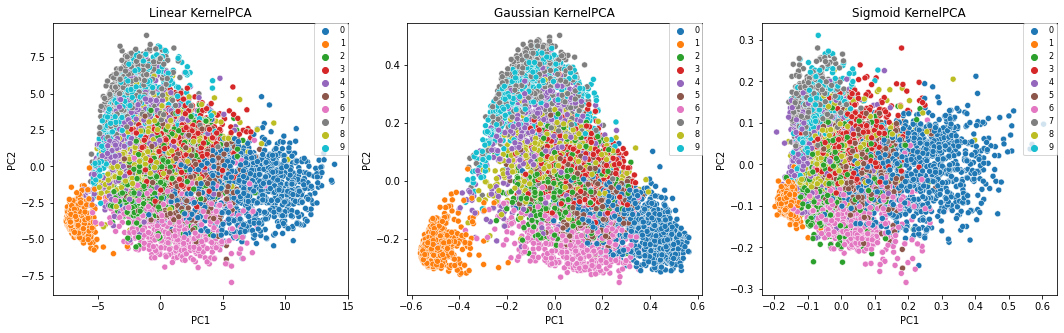

In [525]:
# 散点图可视化降维后的数据
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

sns.scatterplot(x=X_lkernel_pca[:, 0], y=X_lkernel_pca[:, 1],hue=y_train, palette='tab10', ax=ax[0])
# ax[1,0].scatter(X_gkernel_pca[:, 0], X_gkernel_pca[:, 1],label = y_train, c=y_train, cmap='Paired')
ax[0].set_title("Linear KernelPCA")
ax[0].set_xlabel("PC1")
ax[0].set_ylabel("PC2")
ax[0].legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=8)
# ax[0].set_aspect('equal', adjustable='box')

sns.scatterplot(x=X_gkernel_pca[:, 0], y=X_gkernel_pca[:, 1],hue=y_train, palette='tab10', ax=ax[1])
# ax[1,1].scatter(X_skernel_pca[:, 0], X_skernel_pca[:, 1],c=y_train, cmap='Paired')
ax[1].set_title("Gaussian KernelPCA")
ax[1].set_xlabel("PC1")
ax[1].set_ylabel("PC2")
ax[1].legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=8)
# ax[1].set_aspect('equal', adjustable='box')

sns.scatterplot(x=X_skernel_pca[:, 0], y=X_skernel_pca[:, 1],hue=y_train, palette='tab10', ax=ax[2])
# ax[1,1].scatter(X_skernel_pca[:, 0], X_skernel_pca[:, 1],c=y_train, cmap='Paired')
ax[2].set_title("Sigmoid KernelPCA")
ax[2].set_xlabel("PC1")
ax[2].set_ylabel("PC2")
ax[2].legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=8)
# ax[2].set_aspect('equal', adjustable='box')

fig.savefig('kernelPCA_compare.png',dpi=500,bbox_inches='tight')
plt.show()


In [19]:
# 计算每个主成分的贡献度
pca_var = np.var(X_pca, axis=0)
pca_contr = pca_var/np.sum(pca_var)

spca1_var = np.var(X_sparse1_pca, axis=0)
spca1_contr = spca1_var/np.sum(spca1_var)
spca10_var = np.var(X_sparse10_pca, axis=0)
spca10_contr = spca10_var/np.sum(spca10_var)
spca30_var = np.var(X_sparse30_pca, axis=0)
spca30_contr = spca30_var/np.sum(spca30_var)

lkpca_var = np.var(X_lkernel_pca, axis=0)
lkpca_contr = lkpca_var/np.sum(lkpca_var)
gkpca_var = np.var(X_gkernel_pca, axis=0)
gkpca_contr = gkpca_var/np.sum(gkpca_var)
skpca_var = np.var(X_skernel_pca, axis=0)
skpca_contr = skpca_var/np.sum(skpca_var)


In [26]:
a = [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(pca.n_components)]

In [27]:
a

[0.17703816,
 0.26779824,
 0.33351207,
 0.38865456,
 0.4376711,
 0.47652653,
 0.5092975,
 0.5400701]

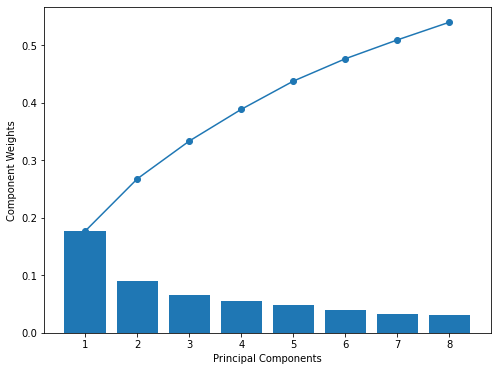

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(np.arange(1, pca.n_components+1), pca.explained_variance_ratio_)
ax.plot(np.arange(1, pca.n_components+1), a, marker = 'o')
ax.set_xlabel('Principal Components')
ax.set_ylabel('Component Weights')
# ax.set_title('KernPCA Component Weights')
fig.savefig('originalPCA_PC12.png',dpi=500,bbox_inches='tight')
plt.show()

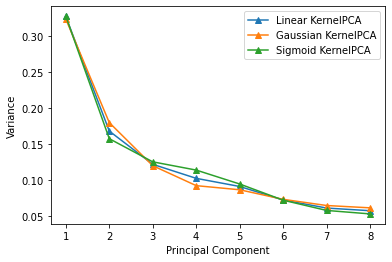

In [32]:
# 绘制每个主成分的贡献度
fig = plt.figure()
# plt.plot(np.arange(1, pca.n_components+1),pca_contr,marker='o', label='PCA')
# plt.plot(np.arange(1, pca.n_components+1),spca1_contr,marker='s', label='SparsePCA with sparsity 1')
# plt.plot(np.arange(1, pca.n_components+1),spca10_contr,marker='s', label='SparsePCA with sparsity 10')
# plt.plot(np.arange(1, pca.n_components+1),spca30_contr,marker='s', label='SparsePCA with sparsity 30')
plt.plot(np.arange(1, pca.n_components+1),lkpca_contr,marker='^', label='Linear KernelPCA')
plt.plot(np.arange(1, pca.n_components+1),gkpca_contr,marker='^', label='Gaussian KernelPCA')
plt.plot(np.arange(1, pca.n_components+1),skpca_contr,marker='^', label='Sigmoid KernelPCA')
plt.legend()
plt.xlabel('Principal Component')
plt.ylabel('Variance')
# plt.title('Contribution of Each Principal Component')
fig.savefig('KPCA_contribution_compare.png',dpi=500,bbox_inches='tight')
plt.show()

## For different n_components

In [436]:
n_components = 16

In [437]:
X = data
y = np.array(labels)

# 数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用PCA对数据进行降维
t = time.time()
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_train)
PCA_time = time.time() - t

# 使用1-SparsePCA对数据进行降维
t = time.time()
sparse1_pca = SparsePCA(n_components=n_components,alpha=1)
X_sparse1_pca = sparse1_pca.fit_transform(X_train)
SPCA1_time = time.time() - t

# 使用10-SparsePCA对数据进行降维
t = time.time()
sparse10_pca = SparsePCA(n_components=n_components,alpha=10)
X_sparse10_pca = sparse10_pca.fit_transform(X_train)
SPCA10_time = time.time() - t

# 使用30-SparsePCA对数据进行降维
t = time.time()
sparse30_pca = SparsePCA(n_components=n_components,alpha=30)
X_sparse30_pca = sparse30_pca.fit_transform(X_train)
SPCA30_time = time.time() - t

# 使用Linear-KernelPCA对数据进行降维
t = time.time()
lkernel_pca = KernelPCA(n_components=n_components, kernel='linear')
X_lkernel_pca = lkernel_pca.fit_transform(X_train)
LKPCA_time = time.time() - t

# 使用Gaussian-KernelPCA对数据进行降维
t = time.time()
gkernel_pca = KernelPCA(n_components=n_components, kernel='rbf')
X_gkernel_pca = gkernel_pca.fit_transform(X_train)
GKPCA_time = time.time() - t

# 使用Sigmoid-KernelPCA对数据进行降维
t = time.time()
skernel_pca = KernelPCA(n_components=n_components, kernel='sigmoid')
X_skernel_pca = skernel_pca.fit_transform(X_train)
SKPCA_time = time.time() - t

In [438]:
# 使用随机森林分类器进行数据分类
t = time.time()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
NoPCA_time_all = time.time()-t

# 分类器在测试集上的表现
print("Accuracy of random forest classifier with original data: ", 
      np.round(rf.score(X_test, y_test),4), 'running time: ',
     np.round(NoPCA_time_all,4))

# 使用降维后的数据进行分类
t = time.time()
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pca.fit(X_pca, y_train)
PCA_time_all = PCA_time + time.time()-t
print("Accuracy of random forest classifier with PCA: ", np.round(rf_pca.score(pca.transform(X_test), y_test),4), 
      "running time: ",np.round(PCA_time_all,4))

t = time.time()
rf_sparse1_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_sparse1_pca.fit(X_sparse1_pca, y_train)
SPCA1_time_all = SPCA1_time + time.time()-t
print("Accuracy of random forest classifier with SparsePCA with sparsity=1: ", 
      np.round(rf_sparse1_pca.score(sparse1_pca.transform(X_test), y_test),4),
      "running time: ",np.round(SPCA1_time_all,4))

t = time.time()
rf_sparse10_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_sparse10_pca.fit(X_sparse10_pca, y_train)
SPCA10_time_all = SPCA10_time + time.time()-t
print("Accuracy of random forest classifier with SparsePCA with sparsity=10: ", 
      np.round(rf_sparse10_pca.score(sparse10_pca.transform(X_test), y_test),4),
      "running time: ",np.round(SPCA10_time_all,4))

t = time.time()
rf_sparse30_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_sparse30_pca.fit(X_sparse30_pca, y_train)
SPCA30_time_all = SPCA30_time + time.time()-t
print("Accuracy of random forest classifier with SparsePCA with sparsity=30: ", 
      np.round(rf_sparse30_pca.score(sparse30_pca.transform(X_test), y_test),4),
      "running time: ",np.round(SPCA30_time_all,4))

t = time.time()
rf_lkernel_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_lkernel_pca.fit(X_lkernel_pca, y_train)
LKPCA_time_all = LKPCA_time + time.time()-t
print("Accuracy of random forest classifier with Linear KernelPCA: ", 
      np.round(rf_lkernel_pca.score(lkernel_pca.transform(X_test), y_test),4),
      "running time: ",np.round(LKPCA_time_all,4))

t = time.time()
rf_gkernel_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_gkernel_pca.fit(X_gkernel_pca, y_train)
GKPCA_time_all = GKPCA_time + time.time()-t
print("Accuracy of random forest classifier with Gaussian KernelPCA: ", 
      np.round(rf_gkernel_pca.score(gkernel_pca.transform(X_test), y_test),4),
      "running time: ",np.round(GKPCA_time_all,4))

t = time.time()
rf_skernel_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_skernel_pca.fit(X_skernel_pca, y_train)
SKPCA_time_all = SKPCA_time + time.time()-t
print("Accuracy of random forest classifier with Sigmoid KernelPCA: ", 
      np.round(rf_skernel_pca.score(skernel_pca.transform(X_test), y_test),4),
      "running time: ",np.round(SKPCA_time_all,4))

Accuracy of random forest classifier with original data:  0.9568 running time:  2.4196
Accuracy of random forest classifier with PCA:  0.9355 running time:  1.7928
Accuracy of random forest classifier with SparsePCA with sparsity=1:  0.943 running time:  248.9211
Accuracy of random forest classifier with SparsePCA with sparsity=10:  0.9423 running time:  27.8298
Accuracy of random forest classifier with SparsePCA with sparsity=30:  0.8325 running time:  4.2281
Accuracy of random forest classifier with Linear KernelPCA:  0.9341 running time:  10.7484
Accuracy of random forest classifier with Gaussian KernelPCA:  0.9272 running time:  11.1792
Accuracy of random forest classifier with Sigmoid KernelPCA:  0.9375 running time:  11.3676


In [439]:
n_components = 32

In [440]:
X = data
y = np.array(labels)

# 数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用PCA对数据进行降维
t = time.time()
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_train)
PCA_time = time.time() - t

# 使用1-SparsePCA对数据进行降维
t = time.time()
sparse1_pca = SparsePCA(n_components=n_components,alpha=1)
X_sparse1_pca = sparse1_pca.fit_transform(X_train)
SPCA1_time = time.time() - t

# 使用10-SparsePCA对数据进行降维
t = time.time()
sparse10_pca = SparsePCA(n_components=n_components,alpha=10)
X_sparse10_pca = sparse10_pca.fit_transform(X_train)
SPCA10_time = time.time() - t

# 使用30-SparsePCA对数据进行降维
t = time.time()
sparse30_pca = SparsePCA(n_components=n_components,alpha=30)
X_sparse30_pca = sparse30_pca.fit_transform(X_train)
SPCA30_time = time.time() - t

# 使用Linear-KernelPCA对数据进行降维
t = time.time()
lkernel_pca = KernelPCA(n_components=n_components, kernel='linear')
X_lkernel_pca = lkernel_pca.fit_transform(X_train)
LKPCA_time = time.time() - t

# 使用Gaussian-KernelPCA对数据进行降维
t = time.time()
gkernel_pca = KernelPCA(n_components=n_components, kernel='rbf')
X_gkernel_pca = gkernel_pca.fit_transform(X_train)
GKPCA_time = time.time() - t

# 使用Sigmoid-KernelPCA对数据进行降维
t = time.time()
skernel_pca = KernelPCA(n_components=n_components, kernel='sigmoid')
X_skernel_pca = skernel_pca.fit_transform(X_train)
SKPCA_time = time.time() - t

In [441]:
# 使用随机森林分类器进行数据分类
t = time.time()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
NoPCA_time_all = time.time()-t

# 分类器在测试集上的表现
print("Accuracy of random forest classifier with original data: ", 
      np.round(rf.score(X_test, y_test),4), 'running time: ',
     np.round(NoPCA_time_all,4))

# 使用降维后的数据进行分类
t = time.time()
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pca.fit(X_pca, y_train)
PCA_time_all = PCA_time + time.time()-t
print("Accuracy of random forest classifier with PCA: ", np.round(rf_pca.score(pca.transform(X_test), y_test),4), 
      "running time: ",np.round(PCA_time_all,4))

t = time.time()
rf_sparse1_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_sparse1_pca.fit(X_sparse1_pca, y_train)
SPCA1_time_all = SPCA1_time + time.time()-t
print("Accuracy of random forest classifier with SparsePCA with sparsity=1: ", 
      np.round(rf_sparse1_pca.score(sparse1_pca.transform(X_test), y_test),4),
      "running time: ",np.round(SPCA1_time_all,4))

t = time.time()
rf_sparse10_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_sparse10_pca.fit(X_sparse10_pca, y_train)
SPCA10_time_all = SPCA10_time + time.time()-t
print("Accuracy of random forest classifier with SparsePCA with sparsity=10: ", 
      np.round(rf_sparse10_pca.score(sparse10_pca.transform(X_test), y_test),4),
      "running time: ",np.round(SPCA10_time_all,4))

t = time.time()
rf_sparse30_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_sparse30_pca.fit(X_sparse30_pca, y_train)
SPCA30_time_all = SPCA30_time + time.time()-t
print("Accuracy of random forest classifier with SparsePCA with sparsity=30: ", 
      np.round(rf_sparse30_pca.score(sparse30_pca.transform(X_test), y_test),4),
      "running time: ",np.round(SPCA30_time_all,4))

t = time.time()
rf_lkernel_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_lkernel_pca.fit(X_lkernel_pca, y_train)
LKPCA_time_all = LKPCA_time + time.time()-t
print("Accuracy of random forest classifier with Linear KernelPCA: ", 
      np.round(rf_lkernel_pca.score(lkernel_pca.transform(X_test), y_test),4),
      "running time: ",np.round(LKPCA_time_all,4))

t = time.time()
rf_gkernel_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_gkernel_pca.fit(X_gkernel_pca, y_train)
GKPCA_time_all = GKPCA_time + time.time()-t
print("Accuracy of random forest classifier with Gaussian KernelPCA: ", 
      np.round(rf_gkernel_pca.score(gkernel_pca.transform(X_test), y_test),4),
      "running time: ",np.round(GKPCA_time_all,4))

t = time.time()
rf_skernel_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_skernel_pca.fit(X_skernel_pca, y_train)
SKPCA_time_all = SKPCA_time + time.time()-t
print("Accuracy of random forest classifier with Sigmoid KernelPCA: ", 
      np.round(rf_skernel_pca.score(skernel_pca.transform(X_test), y_test),4),
      "running time: ",np.round(SKPCA_time_all,4))

Accuracy of random forest classifier with original data:  0.9568 running time:  2.4882
Accuracy of random forest classifier with PCA:  0.9478 running time:  2.4167
Accuracy of random forest classifier with SparsePCA with sparsity=1:  0.954 running time:  620.0358
Accuracy of random forest classifier with SparsePCA with sparsity=10:  0.9478 running time:  20.4704
Accuracy of random forest classifier with SparsePCA with sparsity=30:  0.8415 running time:  6.1476
Accuracy of random forest classifier with Linear KernelPCA:  0.9526 running time:  11.4671
Accuracy of random forest classifier with Gaussian KernelPCA:  0.9478 running time:  11.9853
Accuracy of random forest classifier with Sigmoid KernelPCA:  0.943 running time:  12.6363


In [454]:
import cvxpy as cp
import numpy as np

# Problem data.
m = 30
n = 20
np.random.seed(1)
A = np.random.randn(m, n)
b = np.random.randn(m)

# Construct the problem.
x = cp.Variable(n)
objective = cp.Minimize(cp.sum_squares(A @ x - b))
constraints = [0 <= x, x <= 1]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for x is stored in `x.value`.
print(x.value)
# The optimal Lagrange multiplier for a constraint is stored in
# `constraint.dual_value`.
print(constraints[0].dual_value)

(CVXPY) Apr 05 11:12:13 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Version of ortools (8.2.8710) is too old. Expected >= 9.3.0.')
(CVXPY) Apr 05 11:12:13 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Version of ortools (8.2.8710) is too old. Expected >= 9.3.0.')
[-1.79109255e-19  2.85112420e-02  2.79973443e-19  3.37658729e-20
 -2.72802663e-19  1.49285011e-01 -9.94082533e-20  8.35373900e-20
  2.46718649e-01  5.78224144e-01 -4.03739463e-19  1.01242860e-03
 -9.28486180e-20  2.26767464e-01 -1.58813678e-19 -8.97232272e-20
 -1.22145729e-19 -1.51509428e-19  1.12060672e-19 -3.48318635e-19]
[ 2.50938945  0.          2.78354615  1.79425782 13.08579183  0.
  0.73716363  3.35344995  0.          0.          8.93825054  0.
  7.02955161  0.          4.71068649  3.18873635  2.06090107 10.08166738
  3.0481157   8.53268239]


In [470]:
from sklearn import (manifold, datasets, decomposition, ensemble, 
                     discriminant_analysis,random_projection)

In [479]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t = time.time()
X_tsne = tsne.fit_transform(X)
TSNE_time = time.time() - t

In [480]:
X_tsne_train, X_tsne_test, y_train, y_test = train_test_split(X_tsne, y, test_size=0.2, random_state=42)

In [481]:
t = time.time()
rf_tsne = RandomForestClassifier(n_estimators=100, random_state=42)
rf_tsne.fit(X_tsne_train, y_train)
TSNE_time_all = TSNE_time + time.time()-t
print("Accuracy of random forest classifier with TSNE: ", 
      np.round(rf_tsne.score(X_tsne_test, y_test),4), 
      "running time: ",np.round(TSNE_time_all,4))

Accuracy of random forest classifier with TSNE:  0.965 running time:  42.2226


In [492]:
a = rf_tsne.predict(X_tsne_test)

In [499]:
a.shape

(1457,)

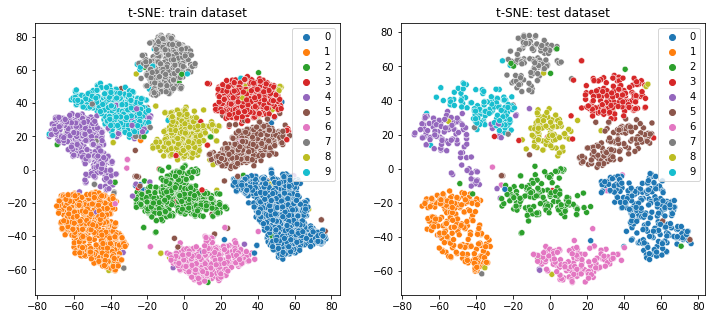

In [508]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.scatterplot(x=X_tsne_train[:,0], y=X_tsne_train[:,1],hue=y_train, palette='tab10',ax=ax[0])
ax[0].set_title("t-SNE: train dataset")
sns.scatterplot(x=X_tsne_test[:,0], y=X_tsne_test[:,1],hue=y_test, palette='tab10',ax=ax[1])
ax[1].set_title("t-SNE: test dataset")
plt.show()